<a href="https://colab.research.google.com/github/devikamohan-24/Machine-learning/blob/main/Feature_Engineering_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Feature Engineering Techniques for Training Machine Learning Models**

In [52]:
# Read in the CSV into a Pandas DataFrame

import pandas as pd

df = pd.read_csv('/content/world_co2.csv')
df = df.dropna()

df

,year,population,gdp,steel,coal,oil,gas,co2
0,1950,2.499322,0.89,189.0,11332.575,6055.578,2136.6338,6.003272
1,1951,2.543130,0.94,205.0,11939.019,6867.236,2534.5093,6.379796
2,1952,2.590271,0.99,221.0,11870.501,7218.299,2729.6267,6.465727
3,1953,2.640279,1.04,237.0,11923.186,7632.513,2886.3450,6.647763
4,1954,2.691979,1.09,253.0,11769.438,7990.694,3027.5981,6.789969
...,...,...,...,...,...,...,...,...
67,2017,7.599822,81.40,1735.0,43059.480,50996.598,36718.7300,36.096738
68,2018,7.683790,86.46,1827.0,45083.880,52190.700,38558.2000,36.826508
69,2019,7.764951,87.65,1875.0,45541.910,52092.734,39684.3120,37.082559
70,2020,7.840953,85.11,1879.0,43394.560,48560.844,38606.0000,35.264086


In [55]:
# Seperate into Train and Test DataFrames

df = df.sample(frac=1, random_state=2)
train_df = df[:50]
train_df = train_df.reset_index(drop=True)
test_df = df[50:]
test_df = test_df.reset_index(drop=True)

train_df

,year,population,gdp,steel,coal,oil,gas,co2
0,1957,2.857867,1.24,300.0,13893.758,10270.767,3880.7158,8.185547
1,2009,6.898306,60.80,1241.0,39646.293,45365.800,29409.0210,31.564031
2,1985,4.861731,12.86,719.0,24276.508,32465.695,16410.3440,20.325486
3,1990,5.316176,22.78,770.0,26344.955,36726.777,19697.1660,22.757480
4,2014,7.339014,79.73,1674.0,45822.684,49112.780,34356.0160,35.577535
5,2006,6.641416,51.78,1250.0,36816.934,46130.555,28518.1600,30.593117
6,1987,5.040985,17.31,739.4,25321.266,34148.080,17678.5780,21.273904
7,1955,2.746072,1.14,270.0,12787.882,8955.483,3293.5630,7.443244
8,2003,6.393898,39.15,971.0,30349.320,43173.340,26046.8730,27.651596
9,2016,7.513474,76.46,1632.0,42106.707,50904.277,35444.7340,35.524191


In [56]:
test_df

,year,population,gdp,steel,coal,oil,gas,co2
0,1989,5.223704,20.20,759.8,26394.465,36037.492,19096.9940,22.410402
1,2001,6.230747,33.62,852.0,27938.290,41841.914,24574.1800,25.668049
2,1993,5.577434,25.83,759.8,24802.262,37105.150,20246.2970,22.812900
3,1956,2.801003,1.19,285.0,13514.091,9745.858,3571.7498,7.924253
4,1978,4.289658,8.66,686.0,20194.787,36124.168,13206.6060,19.077193
5,1952,2.590271,0.99,221.0,11870.501,7218.299,2729.6267,6.465727
6,2021,7.909295,96.51,1951.0,45137.516,49192.050,40534.2030,37.123852
7,1991,5.406246,23.76,766.6,25628.816,36627.695,19959.6900,23.244807
8,1966,3.406417,2.16,483.0,16608.723,19796.810,8219.0380,11.866934
9,2018,7.683790,86.46,1827.0,45083.880,52190.700,38558.2000,36.826508


In [57]:
# Get observed outputs for train and test

y_train = train_df['co2'].to_numpy()
y_test = test_df['co2'].to_numpy()

y_train.shape, y_test.shape

((50,), (22,))

In [58]:
# Get error of baseline model that uses the average median_house_value in train_df

from sklearn.metrics import mean_absolute_error

average_co2 = train_df['co2'].mean()
baseline_model_test_predictions = [average_co2] * len(test_df)

mean_absolute_error(baseline_model_test_predictions, y_test)

7.743123774545453

#### 1. Dimensionality Reduction (PCA)

In [59]:
# Observe correlation between total_rooms, total_bedrooms and households

train_df[['coal', 'co2', 'population']].corr()

,coal,co2,population
coal,1.000000,0.975288,0.967451
co2,0.975288,1.000000,0.991728
population,0.967451,0.991728,1.000000


In [61]:
# Get X_train_3 which has total_rooms, total_bedrooms, and households as inputs

import numpy as np

X_train_3 = train_df[['coal', 'co2', 'population']].to_numpy()

X_train_3.shape

(50, 3)

In [62]:
# Get X_test_3 which has total_rooms, total_bedrooms, and households as inputs

X_test_3 = test_df[['coal', 'co2', 'population']].to_numpy()

X_test_3.shape

(22, 3)

In [63]:
# Get error of random forest training on just (X_train_3, y_train) and testing on (X_test_3, y_test)

from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3, y_train)
forest_base_test_predictions = forest_base.predict(X_test_3)
mean_absolute_error(y_test, forest_base_test_predictions)

0.5010534995194816

In [64]:
# Train PCA (Linear Dimensionality Reduction) with 2-feature output

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_train_3)

pca

PCA(n_components=2)

In [65]:
# Use PCA to transform X_train_3 and X_test_3 into X_train_pca and X_test_pca

X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_train_pca.shape, X_test_pca.shape

((50, 2), (22, 2))

In [66]:
# Get error of Random Forest training on (X_train_pca, y_train) and testing on (X_test_pca, y_test)

forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_pca, y_train)
forest_pca_test_predictions = forest_pca.predict(X_test_pca)

mean_absolute_error(y_test, forest_pca_test_predictions)

0.7834182398831184

#### 2. Preprocessing / Scaling

In [67]:
X_train_3

array([[1.38937580e+04, 8.18554700e+00, 2.85786675e+00],
       [3.96462930e+04, 3.15640310e+01, 6.89830605e+00],
       [2.42765080e+04, 2.03254860e+01, 4.86173082e+00],
       [2.63449550e+04, 2.27574800e+01, 5.31617587e+00],
       [4.58226840e+04, 3.55775350e+01, 7.33901363e+00],
       [3.68169340e+04, 3.05931170e+01, 6.64141619e+00],
       [2.53212660e+04, 2.12739040e+01, 5.04098458e+00],
       [1.27878820e+04, 7.44324400e+00, 2.74607206e+00],
       [3.03493200e+04, 2.76515960e+01, 6.39389850e+00],
       [4.21067070e+04, 3.55241910e+01, 7.51347405e+00],
       [1.49307510e+04, 9.75106000e+00, 3.12668672e+00],
       [3.84407930e+04, 3.15067890e+01, 6.72594842e+00],
       [2.22044500e+04, 1.88844860e+01, 4.60798464e+00],
       [2.64152190e+04, 2.47323890e+01, 6.06775859e+00],
       [2.48522950e+04, 2.06273590e+01, 4.95006310e+00],
       [1.77127540e+04, 1.70174770e+01, 3.99551693e+00],
       [2.68019700e+04, 2.54536230e+01, 6.14889882e+00],
       [4.30594800e+04, 3.60967

In [68]:
X_train_3_scaled

array([[ 1.44297425,  1.50739581,  1.49334969],
       [-0.01641816, -0.07337164, -0.08111927],
       [-1.56702261, -1.47116129, -1.41437069],
       [ 1.6253983 ,  1.61034442,  1.67130402],
       [-0.33566026, -0.19848922, -0.41007522],
       [ 0.48524798,  0.31090347,  0.47286742],
       [ 1.03252013,  1.10537932,  1.0401012 ],
       [ 0.43964196,  0.24067466,  0.4257582 ],
       [ 0.57646   ,  0.31630361,  0.56611755],
       [-0.29005424, -0.14423722, -0.36641637],
       [ 0.02918785, -0.04311462, -0.03032606],
       [ 0.66767203,  0.44062636,  0.65903351],
       [-0.47247829, -0.40121292, -0.5367073 ],
       [ 1.35176222,  1.45345433,  1.39374114],
       [-1.15656849, -1.16967945, -1.14059984],
       [ 0.39403595,  0.19164017,  0.37832336],
       [-1.11096248, -1.16659314, -1.11234478],
       [-1.61262862, -1.50890065, -1.4395615 ],
       [-0.97414444, -1.02515204, -0.99800605],
       [ 1.12373216,  1.23352579,  1.14015873],
       [-0.38126627, -0.25605656, -0.452

(array([8., 6., 2., 6., 6., 4., 6., 1., 4., 7.]),
 array([-1.50011349, -1.17920601, -0.85829853, -0.53739104, -0.21648356,
         0.10442392,  0.4253314 ,  0.74623889,  1.06714637,  1.38805385,
         1.70896134]),
 <BarContainer object of 10 artists>)

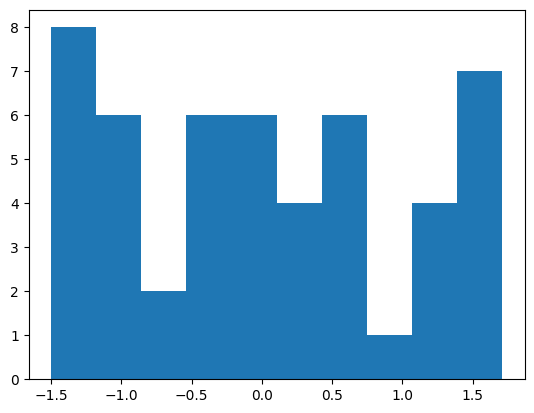

In [69]:
# Test different preprocessing functions on X_train_3

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

scaler = StandardScaler().fit(X_train_3)
X_train_3_scaled = scaler.transform(X_train_3)

plt.hist(X_train_3_scaled[:, 1])

In [70]:
# Preprocess X_test_3

X_test_3_scaled = scaler.transform(X_test_3)

X_test_3_scaled.shape

(22, 3)

In [71]:
# Get error of Random Forest training on (X_train_scaled, y_train) and testing on (X_test_scaled, y_test)

random_forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3_scaled, y_train)
random_forest_scaled_test_predictions = random_forest_scaled.predict(X_test_3_scaled)

mean_absolute_error(y_test, random_forest_scaled_test_predictions)

0.42316499053463397

In [72]:
# Create Pipeline of Normalization -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

scale_pca_pipe_forest = Pipeline(steps=[('Scaler', Normalizer()),
                                 ('PCA', PCA(n_components=2)),
                                 ('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))])
scale_pca_pipe_forest

Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [73]:
# Get error of Normalization -> PCA -> Random Forest pipeline

scale_pca_pipe_forest.fit(X_train_3, y_train)
scale_pca_pipe_forest_test_predictions = scale_pca_pipe_forest.predict(X_test_3)

mean_absolute_error(y_test, scale_pca_pipe_forest_test_predictions)

2.4617954388458703

#### 3. Categorical Encoding (Dummy / One-Hot)

In [75]:
# Get dummy variables (one-hot encoding) for the training set

train_dummies = pd.get_dummies(train_df['year'])
train_dummies.head()

,1950,1951,1953,1954,1955,1957,1958,1959,1960,1961,...,2007,2008,2009,2010,2012,2014,2015,2016,2017,2020
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [76]:
# Concatenate dummy variables to the training DataFrame

train_df = pd.concat([train_df, train_dummies], axis=1)
train_df.head()

,year,population,gdp,steel,coal,oil,gas,co2,1950,1951,...,2007,2008,2009,2010,2012,2014,2015,2016,2017,2020
0,1957,2.857867,1.24,300.0,13893.758,10270.767,3880.7158,8.185547,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,6.898306,60.80,1241.0,39646.293,45365.800,29409.0210,31.564031,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1985,4.861731,12.86,719.0,24276.508,32465.695,16410.3440,20.325486,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1990,5.316176,22.78,770.0,26344.955,36726.777,19697.1660,22.757480,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,7.339014,79.73,1674.0,45822.684,49112.780,34356.0160,35.577535,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Observe frequency of categories

train_df['year'].value_counts()

In [78]:
# Get dummy variables (one-hot encoding) for the test set

test_dummies = pd.get_dummies(test_df['year'])
test_dummies.head()

,1952,1956,1966,1968,1969,1977,1978,1980,1983,1989,...,1994,1995,2001,2004,2005,2011,2013,2018,2019,2021
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Make X_train_dummies using only dummies

X_train_dummies = train_df.to_numpy()[:, -4:]
X_train_dummies.shape

(50, 4)

In [80]:
# Make X_test_dummies using only dummies

X_test_dummies = test_df.to_numpy()[:, -4:]
X_test_dummies.shape

(22, 4)

In [81]:
# Check error of linear regression model using only dummies

from sklearn.linear_model import LinearRegression

linear_dummy = LinearRegression().fit(X_train_dummies, y_train)
linear_dummy_test_predictions = linear_dummy.predict(X_test_dummies)
mean_absolute_error(y_test, linear_dummy_test_predictions)

1430257.0932175203

#### 4. Binning (Grouping, Aggregating)

<Axes: >

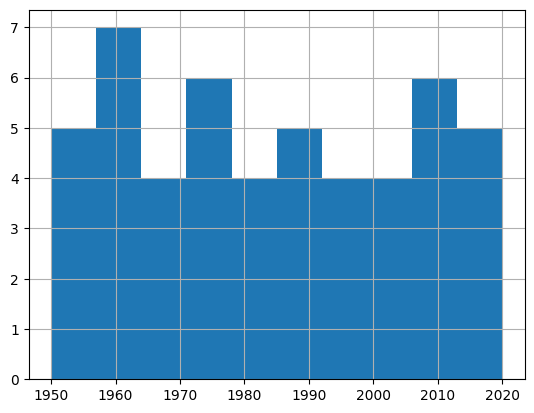

In [82]:
train_df['year'].hist()

In [83]:
# Add new binary column to training DataFrame where median_age < 30

train_df['co2_10'] = (train_df['co2'] < 10).astype(int)
train_df.head()

,year,population,gdp,steel,coal,oil,gas,co2,1950,1951,...,2008,2009,2010,2012,2014,2015,2016,2017,2020,co2_10
0,1957,2.857867,1.24,300.0,13893.758,10270.767,3880.7158,8.185547,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2009,6.898306,60.80,1241.0,39646.293,45365.800,29409.0210,31.564031,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1985,4.861731,12.86,719.0,24276.508,32465.695,16410.3440,20.325486,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1990,5.316176,22.78,770.0,26344.955,36726.777,19697.1660,22.757480,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014,7.339014,79.73,1674.0,45822.684,49112.780,34356.0160,35.577535,0,0,...,0,0,0,0,1,0,0,0,0,0


In [84]:
# Setup X_train_median_age which only uses the binary indicator

X_train_median_age = train_df['co2_10'].to_numpy().reshape(-1, 1)
X_train_median_age.shape

(50, 1)

In [85]:
# Setup X_test_median_age which only uses the binary indicator

test_df['co2_10'] = (test_df['co2'] < 30).astype(int)
X_test_median_age = test_df['co2_10'].to_numpy().reshape(-1, 1)
X_test_median_age.shape

(22, 1)

In [86]:
# Check error of linear model that only uses the binary variable

linear_median_age = LinearRegression().fit(X_train_median_age, y_train)
linear_median_age_test_predictions = linear_median_age.predict(X_test_median_age)
mean_absolute_error(y_test, linear_median_age_test_predictions)

11.78541717111676

#### 5. Clustering

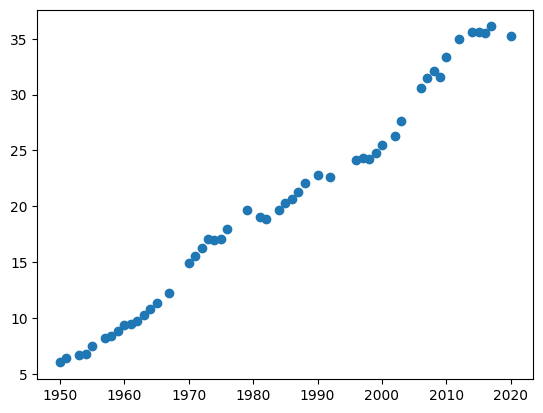

In [87]:
# Plot map of California!

plt.scatter(train_df['year'], train_df['co2'])

In [88]:
# Make KMeans model from Longitude & Latitude and get clusters

from sklearn.cluster import KMeans

X_train_lat_long = train_df[['year', 'co2']].to_numpy()
kmeans = KMeans(n_clusters=7).fit(X_train_lat_long)
kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 2, 2, 6, 0, 2, 3, 4, 6, 1, 0, 2, 4, 2, 5, 4, 6, 1, 5, 1, 5,
       5, 3, 1, 3, 1, 5, 4, 2, 6, 1, 4, 1, 5, 4, 5, 1, 3, 6, 0, 2, 0, 3,
       5, 4, 3, 6, 2, 2], dtype=int32)

In [89]:
# Plot colored map of California

import plotly.express as px

px.scatter(x=train_df['year'], y=train_df['co2'], color=kmeans.labels_)

In [90]:
# Make X_train_clustering which uses a one-hot encoding from the cluster label

X_train_clustering = pd.get_dummies(pd.Series(kmeans.labels_)).to_numpy()
X_train_clustering

array([[0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0,

In [91]:
# Predict the clusters for the test data, and create X_test_clustering using one-hot encoding

X_test_lat_long = test_df[['year', 'co2']].to_numpy()
X_test_clustering = pd.get_dummies(pd.Series(kmeans.predict(X_test_lat_long))).to_numpy()
X_test_clustering.shape

(22, 7)

In [92]:
# Check error of linear model that only uses the cluster one-hot encodings

linear_clustering = LinearRegression().fit(X_train_clustering, y_train)
linear_clustering_test_predictions = linear_clustering.predict(X_test_clustering)
mean_absolute_error(linear_clustering_test_predictions, y_test)

1.7933965745671

#### 6. Feature Selection (Combinations of Features)

In [93]:
# Observe shapes of X_train_clustering, X_train_scaled and dummy_X_train

X_train_clustering.shape, X_train_3_scaled.shape, X_train_dummies.shape

((50, 7), (50, 3), (50, 4))

In [94]:
# Concatenate the training arrays side-by-side to make one big X_train_full input matrix

X_train_full = np.concatenate([X_train_clustering, X_train_3_scaled, X_train_dummies], axis=1)
X_train_full

array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        , -1.02245357, -1.26740239, -1.21393098,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.43857806,  1.22560738,  1.24946501,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.03022985,  0.02716344,  0.00779526,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.16744054,  0.28650381,  0.28486368,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  2.02882262,  1.65359512,  1.5181579 ,
         0.        ,  0.  

In [95]:
# Observe shapes of X_test_clustering, X_test_scaled and dummy_X_test

X_test_clustering.shape, X_test_3_scaled.shape, X_test_dummies.shape

((22, 7), (22, 3), (22, 4))

In [96]:
# Concatenate the test arrays side-by-side to make one big X_train_full input matrix

X_test_full = np.concatenate([X_test_clustering, X_test_3_scaled, X_test_dummies], axis=1)
X_test_full.shape

(22, 14)

In [97]:
# Check error of a random forest that uses the combination of these features

random_forest_full = RandomForestRegressor().fit(X_train_full, y_train)
random_forest_full_test_predictions = random_forest_full.predict(X_test_full)

mean_absolute_error(random_forest_full_test_predictions, y_test)

0.4706134218181783